# Routes on world map

- The visual representation of the routes will give understanding of the geography of airline business

In [1]:
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [3]:
raw_data = '../Data/raw_data/'
uniqueroutes = pd.read_csv(raw_data +'UniqueRoutesData.csv' , low_memory=False)

In [4]:
international_routes = uniqueroutes[uniqueroutes['Country_start'] != uniqueroutes['Country_end']].reset_index(drop=True)
international_routes = international_routes.dropna(subset=['Tz_DB_start'])
europe_routes = international_routes[international_routes.Tz_DB_start.str.startswith('Europe/')].reset_index(drop=True)
europe_routes = europe_routes[europe_routes.Tz_DB_end.str.startswith('Europe/')].reset_index(drop=True)

domestic_routes = uniqueroutes[uniqueroutes['Country_start'] == uniqueroutes['Country_end']].reset_index(drop=True)
domestic_US = domestic_routes[domestic_routes['Country_start'] == 'United States'].reset_index(drop=True)

bos_flights = domestic_US[domestic_US['City_start'] == 'Boston']
bos_flights.to_csv("../Output/BostonFlightsData.csv", index=False)

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



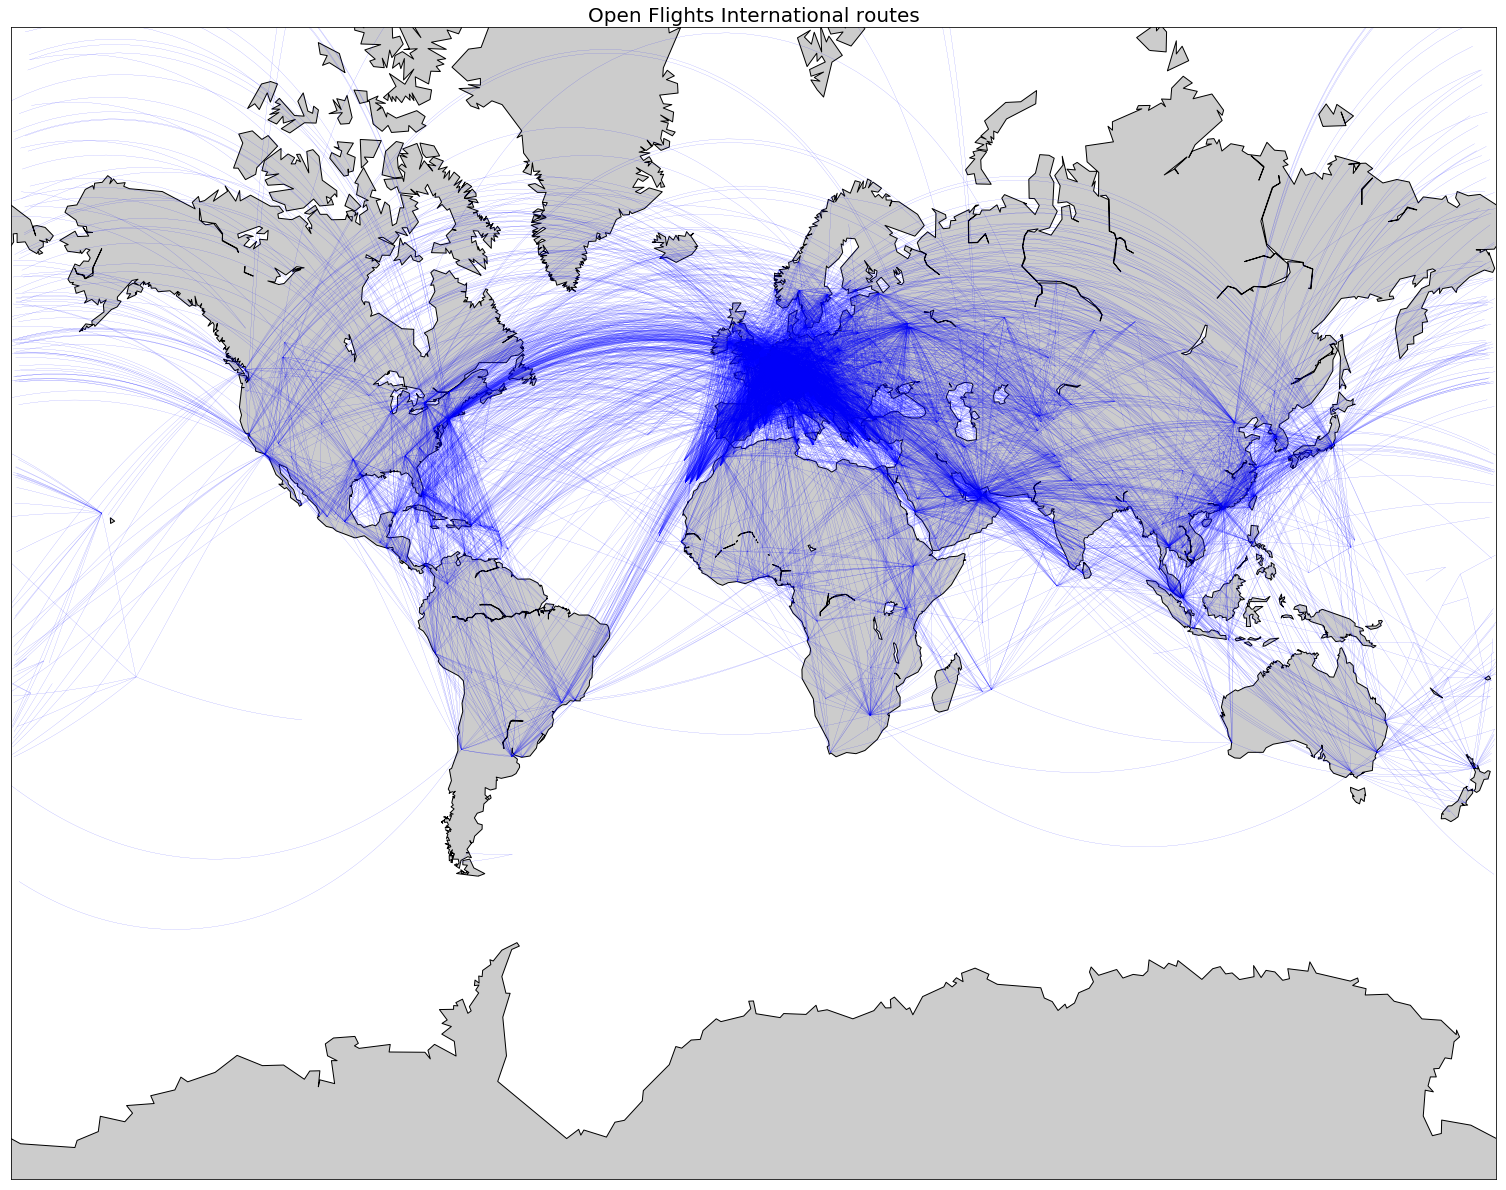

In [5]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    
for i, route in international_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.1,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights International routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



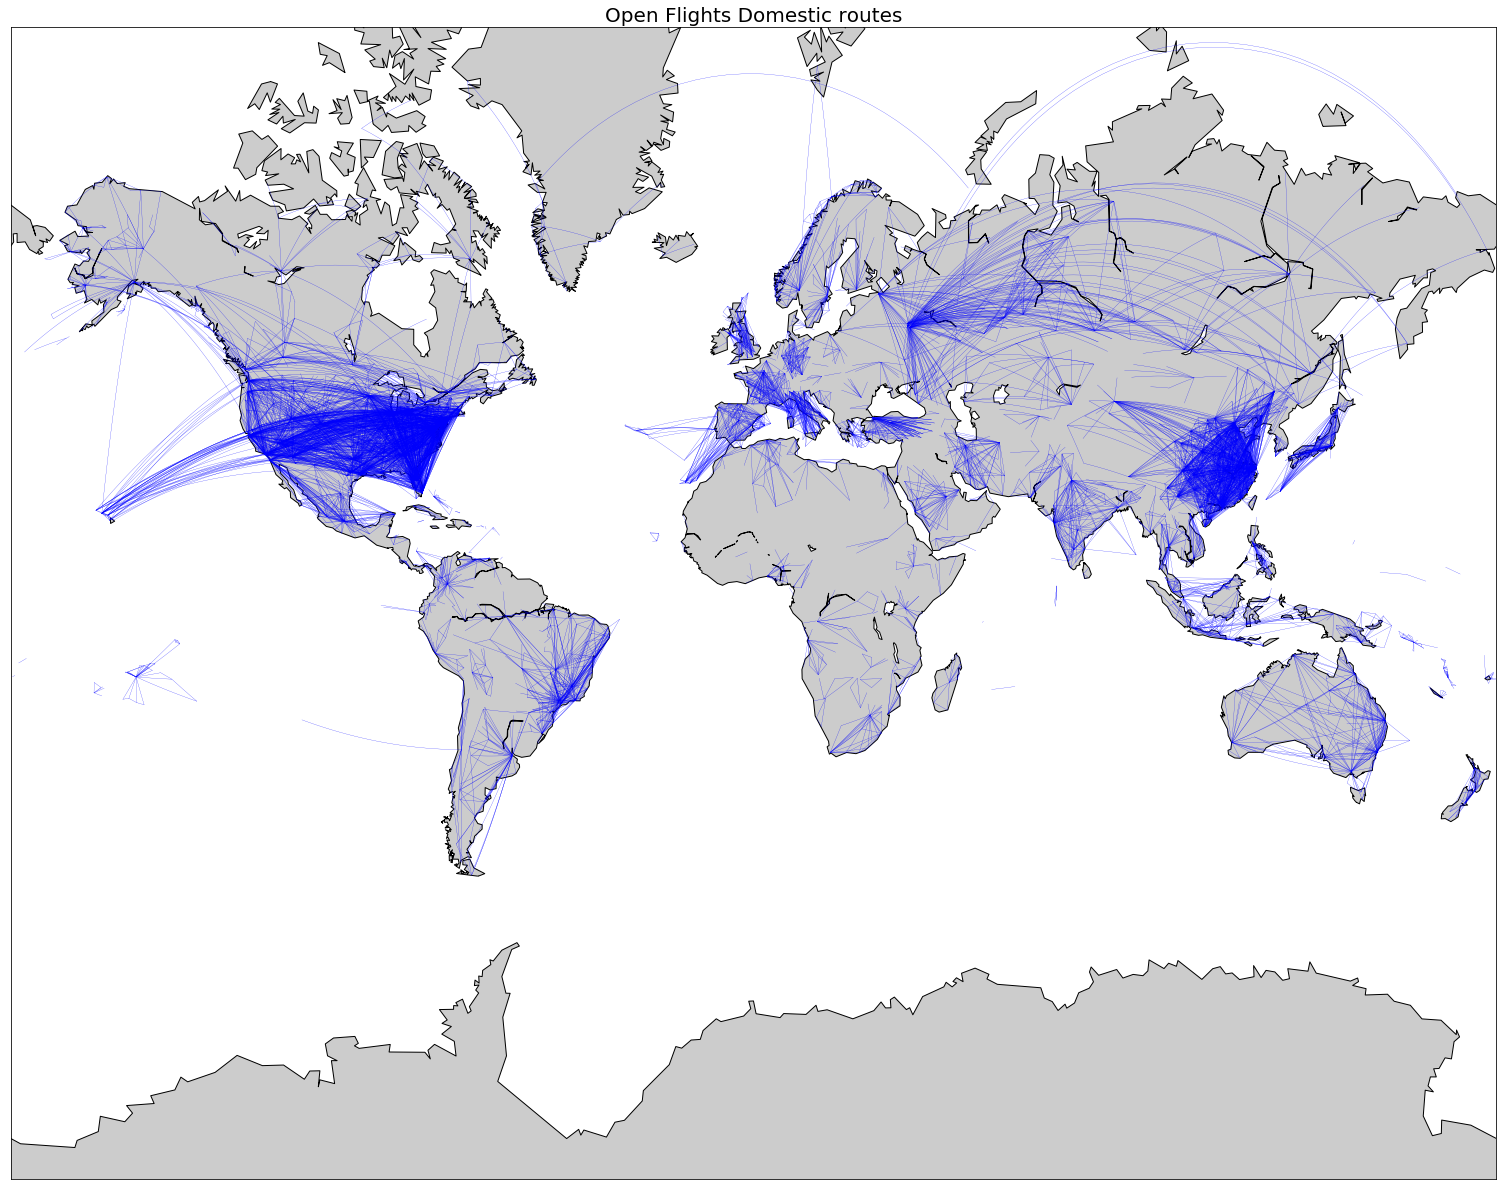

In [6]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    
for i, route in domestic_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.2,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights Domestic routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/sumitdeshmukh/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



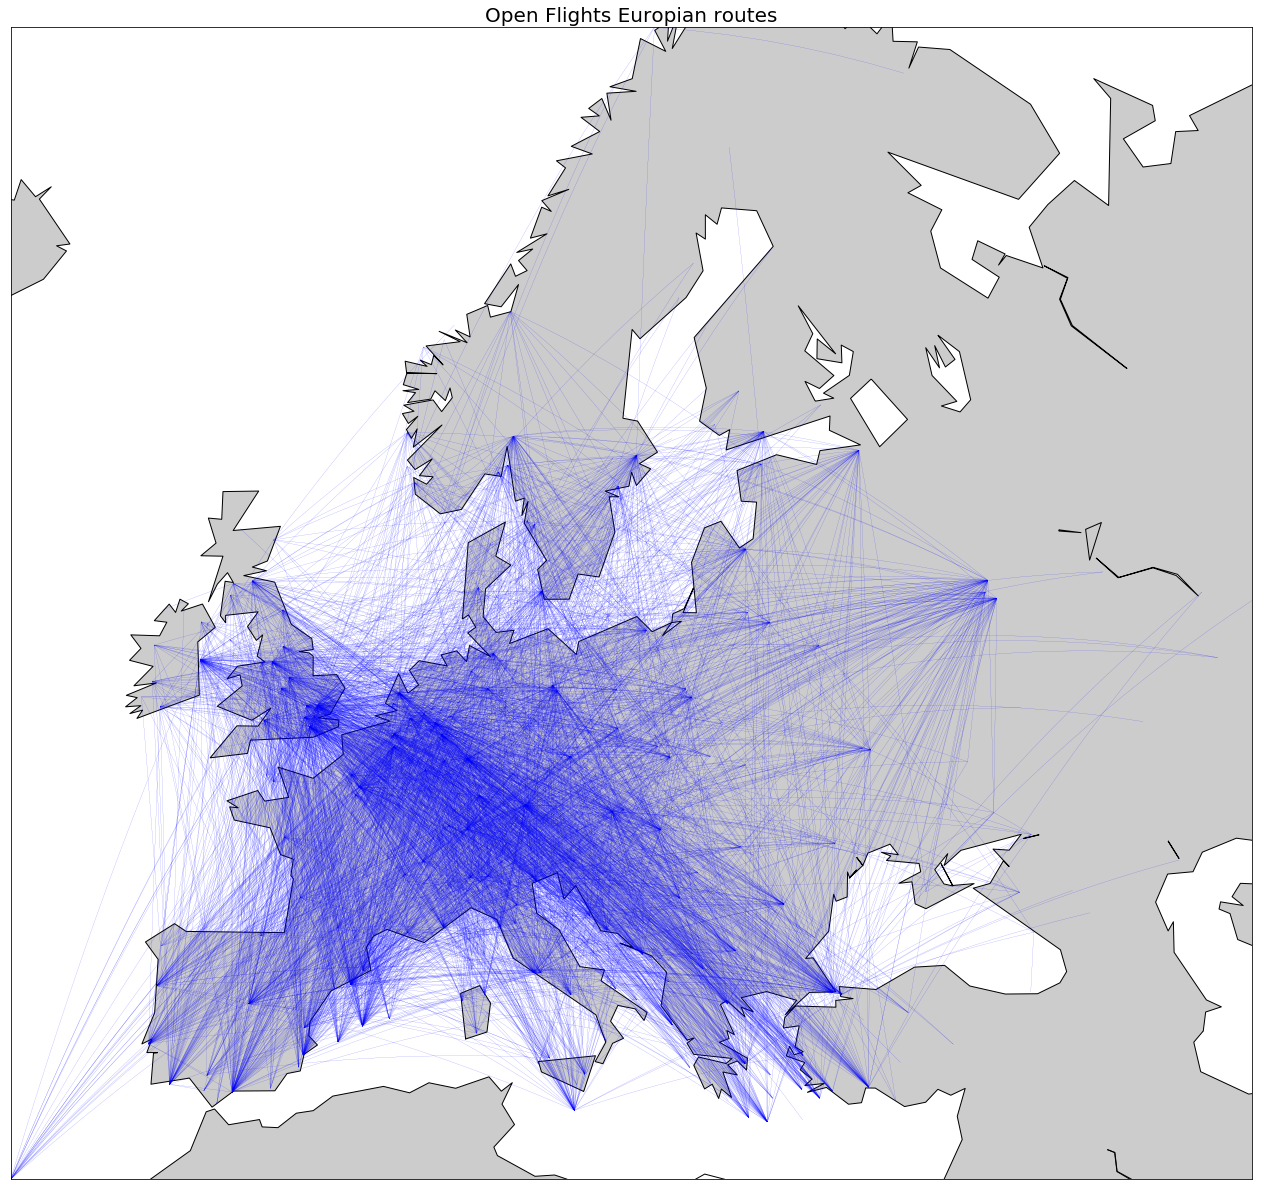

In [7]:
# create new figure, axes instances.
fig=plt.figure(figsize=(27, 20))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=europe_routes['Latitude_start'].min(),
            urcrnrlat=europe_routes['Latitude_end'].max(),
            llcrnrlon=europe_routes['Longitude_start'].min(),
            urcrnrlon=europe_routes['Longitude_end'].max(),
            lat_ts=20,
            resolution='c')
    
for i, route in europe_routes.iterrows():
    line, = m.drawgreatcircle(route['Longitude_start'],route['Latitude_start'],route['Longitude_end'],
                      route['Latitude_end'],linewidth=0.1,color='b')
    
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
    
m.drawcoastlines()
m.fillcontinents()
# draw parallels
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Open Flights Europian routes', fontsize=20)
plt.show()
#plt.savefig('Output/images/worldmap.png', format='png', bbox_inches='tight')
plt.close()

In [8]:
europe_routes = europe_routes.sample(n=2000).reset_index(drop=True)
airports = [ dict(
        type = 'scattergeo',
        locationmode = 'country names',
        lon = europe_routes['Longitude_start'],
        lat = europe_routes['Latitude_start'],
        hoverinfo = 'text',
        text = europe_routes['Airport_start'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( europe_routes )):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'country names',
            lon = [ europe_routes['Longitude_start'][i], europe_routes['Longitude_end'][i] ],
            lat = [ europe_routes['Latitude_start'][i], europe_routes['Latitude_end'][i] ],
            mode = 'lines',
            line = dict(
                width = 0.1,
                color = 'blue',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
        title = 'Europe flight routes<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='europe',
            projection=dict( type='equirectangular' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
            resolution = 110
        ),
    )
    
fig = dict( data= flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

In [9]:
domestic_US = domestic_US.sample(n=2000).reset_index(drop=True)
airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = domestic_US['Longitude_start'],
        lat = domestic_US['Latitude_start'],
        hoverinfo = 'text',
        text = domestic_US['Airport_start'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( domestic_US )):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ domestic_US['Longitude_start'][i], domestic_US['Longitude_end'][i] ],
            lat = [ domestic_US['Latitude_start'][i], domestic_US['Latitude_end'][i] ],
            mode = 'lines',
            line = dict(
                width = 0.1,
                color = 'blue',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
        title = 'United States Domestic flight routes<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data= flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

In [10]:
domestic_routes.to_csv("../Extras/domestic_routes.csv", index=False)
domestic_US.to_csv("../Extras/domestic_US.csv", index=False)
domestic_US[domestic_US["Destination_Airport"] == "ATL"]

Airline_Code  Airline_ID Source_Airport  Source_Airport_ID  \
256            AF         137            ABY               5715   
409            AF         137            AEX               3852   
629            AF         137            ALB               3864   
875            AF         137            AGS               3658   
1579           AF         137            ABE               4355   
1860           9E        3976            MDT               3542   

     Destination_Airport  Destination_Airport_ID Codeshare  Stops Equipment  \
256                  ATL                    3682         Y      0       CRJ   
409                  ATL                    3682         Y      0       CRJ   
629                  ATL                    3682         Y      0   CR9 M88   
875                  ATL                    3682         Y      0   CRJ 717   
1579                 ATL                    3682         Y      0       CRJ   
1860                 ATL                    3682       NaN      0       CRJ   

                           Airport_start     ...      DST_end  \
256   Southwest Georgia Regional Airport     ...            A   
409                      Alexandria Intl     ...            A   
629                          Albany Intl     ...            A   
875             Augusta Rgnl At Bush Fld     ...            A   
1579                  Lehigh Valley Intl     ...            A   
1860                     Harrisburg Intl     ...            A   

             Tz_DB_end       Airline_Name Alias  IATA  ICAO  Callsign  \
256   America/New_York         Air France   NaN    AF   AFR  AIRFRANS   
409   America/New_York         Air France   NaN    AF   AFR  AIRFRANS   
629   America/New_York         Air France   NaN    AF   AFR  AIRFRANS   
875   America/New_York         Air France   NaN    AF   AFR  AIRFRANS   
1579  America/New_York         Air France   NaN    AF   AFR  AIRFRANS   
1860  America/New_York  Pinnacle Airlines   NaN    9E   FLG  FLAGSHIP   

         Airline_HQ Active Distance(km)  
256          France      Y       234.05  
409          France      Y       804.93  
629          France      Y      1372.33  
875          France      Y       230.81  
1579         France      Y      1114.03  
1860  United States      Y       997.16  

[6 rows x 39 columns]